In [47]:
from custom import preprocessing as pr
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Data preprocessing

In [48]:
mnist = pr.import_mnist()
X, y = mnist["data"], mnist["target"]
y = y.astype('int32')

In [49]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [50]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

## Saving the scaler

In [12]:
try:
    import cPickle as pickle
except ModuleNotFoundError:
    import pickle
    
filename = "scaler"
with open(filename, 'wb') as output:  
    pickle.dump(scaler, output, pickle.HIGHEST_PROTOCOL)

# Stochastic gradient

In [6]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_scaled, y_train)

SGDClassifier(random_state=42)

In [7]:
sgd_score=cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

In [8]:
sgd_score

array([0.8977 , 0.90435, 0.8986 ])

In [9]:
sgd_score.mean()

0.9002166666666667

## Saving the model

In [14]:
import joblib
filename = 'sgd_clf.sav'
joblib.dump(sgd_clf, filename)

['sgd_clf.sav']

# K nearest neighbours

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=1,weights="uniform", metric="cosine")
knn_clf.fit(X_train_scaled,y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=1)

In [54]:
knn_score=cross_val_score(knn_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

In [55]:
knn_score

array([0.9422 , 0.9428 , 0.94065])

In [56]:
knn_score.mean()

0.9418833333333333

## Saving the model

In [57]:
import joblib
filename = 'knn_1_uniform_cosine.sav'
joblib.dump(knn_clf, filename)

['knn_1_uniform_cosine.sav']

# Evaluating on test set

In [58]:
model1 = joblib.load("knn_1_uniform_cosine.sav")

In [59]:
X_test_scaled = scaler.transform(X_test)

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [61]:
predictions = model1.predict(X_test_scaled)
accuracy_score(y_test, predictions)

0.9439

In [62]:
print (classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.99      0.98      1135
           2       0.96      0.94      0.95      1032
           3       0.92      0.94      0.93      1010
           4       0.96      0.94      0.95       982
           5       0.94      0.90      0.92       892
           6       0.96      0.98      0.97       958
           7       0.92      0.94      0.93      1028
           8       0.94      0.91      0.92       974
           9       0.93      0.91      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [63]:
conf_mx = confusion_matrix(y_test, predictions)
conf_mx

array([[ 962,    0,    0,    4,    0,    4,    8,    1,    1,    0],
       [   0, 1127,    4,    0,    1,    1,    2,    0,    0,    0],
       [  13,    4,  971,   13,    2,    0,    5,   11,   11,    2],
       [   0,    0,    6,  951,    1,   17,    1,   13,   18,    3],
       [   2,    7,    5,    1,  919,    2,    7,    8,    4,   27],
       [   5,    0,    2,   32,    3,  807,   12,    2,   20,    9],
       [  11,    3,    1,    2,    1,    3,  936,    0,    1,    0],
       [   0,   15,   13,    4,    4,    0,    0,  962,    2,   28],
       [  15,    1,    7,   19,    8,   22,    4,    9,  884,    5],
       [   8,    4,    5,   13,   17,    4,    0,   35,    3,  920]])

## Confusion matrix plot

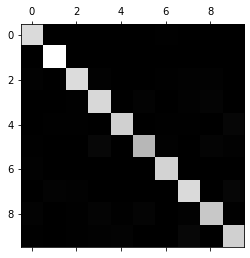

In [64]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

## Error plot

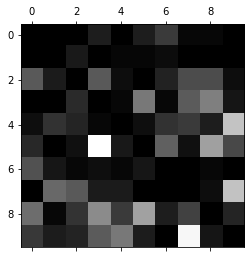

In [65]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

**Slightly worse performence than random forest, yet KNN with cosine metric proved to be clearly faster**

# Random forest classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
forest=RandomForestClassifier()
forest.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [35]:
forest_score=cross_val_score(knn_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

In [36]:
forest_score

array([0.9416 , 0.94195, 0.9431 ])

In [37]:
forest_score.mean()

0.9422166666666666

## Saving the model

In [38]:
import joblib
filename = 'forest.sav'
joblib.dump(forest, filename)

['forest.sav']

# Evaluating on test set

In [39]:
model1 = joblib.load("forest.sav")

In [40]:
X_test_scaled = scaler.transform(X_test)

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [42]:
predictions = model1.predict(X_test_scaled)
accuracy_score(y_test, predictions)

0.9704

In [43]:
print (classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [44]:
conf_mx = confusion_matrix(y_test, predictions)
conf_mx

array([[ 970,    0,    0,    0,    0,    3,    2,    1,    3,    1],
       [   0, 1125,    2,    1,    0,    1,    3,    0,    2,    1],
       [   5,    0, 1002,    6,    3,    0,    3,    8,    5,    0],
       [   0,    0,   11,  974,    0,    7,    0,    9,    5,    4],
       [   1,    0,    1,    0,  957,    0,    5,    0,    2,   16],
       [   2,    1,    1,   11,    3,  863,    5,    1,    4,    1],
       [   6,    3,    0,    0,    3,    5,  938,    0,    3,    0],
       [   1,    2,   20,    2,    2,    0,    0,  986,    4,   11],
       [   4,    0,    6,    8,    4,    6,    4,    3,  930,    9],
       [   6,    5,    3,   10,   11,    3,    1,    4,    7,  959]])

## Confusion matrix plot

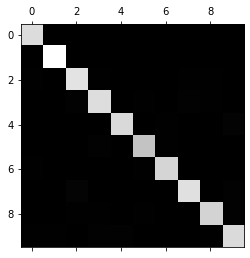

In [45]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

## Error plot

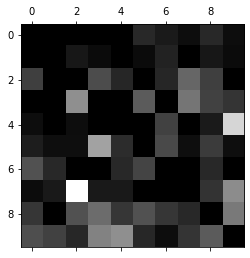

In [46]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

# Conclusions

**Random forest proved to be the best with 97% accuracy score. Yet KNN was with cosine metric was visibly faster, with still high accuracy of 94%**